## CH14 Q13

 ## This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Weekly = pd.read_csv('Weekly.csv')

##  Repeat (d)  'Now fit the logistic regression model using a training data period  from 1990 to 2008, with Lag2 as the only predictor. Compute th 
 confusion matrix and the overall fraction of correct predictio 
 for the held out data (that is, the data from 2009 and 201'0). using LDA.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]
test_data = Weekly[(Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)]

X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Confusion matrix and accuracy for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("\nLDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy:", accuracy_lda)


LDA Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
LDA Accuracy: 0.625


 ## (f) Repeat (d) using QDA.

In [7]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Confusion matrix and accuracy for QDA
conf_matrix_qda = confusion_matrix(y_test,y_pred_qda)
accuracy_qda = accuracy_score(y_test,y_pred_qda)

print("\nQDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy:", accuracy_qda)



QDA Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
QDA Accuracy: 0.5865384615384616


##  (g) Repeat (d) using KNN with K =1.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Part (g): K-Nearest Neighbors (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion matrix and accuracy for KNN (K=1)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nKNN (K=1) Confusion Matrix:\n", conf_matrix_knn)
print("KNN (K=1) Accuracy:", accuracy_knn)


KNN (K=1) Confusion Matrix:
 [[22 21]
 [30 31]]
KNN (K=1) Accuracy: 0.5096153846153846


##  (h) Repeat (d) using naive Bayes.

In [11]:
from sklearn.naive_bayes import GaussianNB

# Part (h): Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy:", accuracy_nb)



Naive Bayes Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Naive Bayes Accuracy: 0.5865384615384616


##  (i) Which of these methods appears to provide the best results on this data?

In [13]:
print("LDA provides the best results on this data, the accuracy is 0.625.")

LDA provides the best results on this data, the accuracy is 0.625.


## (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [15]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define a function to experiment with combinations and transformations of predictors
def experiment_with_model(model, X_train, y_train, X_test, y_test, description):
    # Fit model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{description} Confusion Matrix:\n", conf_matrix)
    print(f"{description} Accuracy:", accuracy)
    return accuracy, conf_matrix

# Additional features and transformations
Weekly['Lag2^2'] = Weekly['Lag2'] ** 2
Weekly['Lag1*Lag2'] = Weekly['Lag1'] * Weekly['Lag2']

train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]
test_data = Weekly[(Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)]

# Define the target variable for training and testing
y_train = train_data['Direction']
y_test = test_data['Direction']
# New feature sets with transformations
features_list = [
    ['Lag2'],
    ['Lag1', 'Lag2'],
    ['Lag2', 'Lag2^2'],
    ['Lag1', 'Lag2', 'Lag1*Lag2']
]

best_accuracy = 0
best_model = None
best_conf_matrix = None

for features in features_list:
    X_train = train_data[features]
    X_test = test_data[features]

    # Logistic Regression with different features
    experiment_with_model(
        LogisticRegression(), X_train, y_train, X_test, y_test,
        f"Logistic Regression with features {features}"
    )

    # LDA with different features
    experiment_with_model(
        LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test,
        f"LDA with features {features}"
    )

    # QDA with different features
    experiment_with_model(
        QuadraticDiscriminantAnalysis(), X_train, y_train, X_test, y_test,
        f"QDA with features {features}"
    )

    # KNN with different values of K
    for k in range(1, 6):  # Testing K=1 to K=5
        knn_model = Pipeline([
            ('scaler', StandardScaler()),  # Scaling for KNN
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ])
        accuracy, conf_matrix = experiment_with_model(
            knn_model, X_train, y_train, X_test, y_test,
            f"KNN (K={k}) with features {features}"
        )
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = f"KNN (K={k}) with features {features}"
            best_conf_matrix = conf_matrix

    # Naive Bayes with different features
    experiment_with_model(
        GaussianNB(), X_train, y_train, X_test, y_test,
        f"Naive Bayes with features {features}"
    )

# Report the best model and confusion matrix
print(f"\nBest Model: {best_model}")
print("Best Confusion Matrix:\n", best_conf_matrix)
print("Best Accuracy:", best_accuracy)



Logistic Regression with features ['Lag2'] Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Logistic Regression with features ['Lag2'] Accuracy: 0.625

LDA with features ['Lag2'] Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
LDA with features ['Lag2'] Accuracy: 0.625

QDA with features ['Lag2'] Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
QDA with features ['Lag2'] Accuracy: 0.5865384615384616

KNN (K=1) with features ['Lag2'] Confusion Matrix:
 [[22 21]
 [32 29]]
KNN (K=1) with features ['Lag2'] Accuracy: 0.49038461538461536

KNN (K=2) with features ['Lag2'] Confusion Matrix:
 [[31 12]
 [43 18]]
KNN (K=2) with features ['Lag2'] Accuracy: 0.47115384615384615

KNN (K=3) with features ['Lag2'] Confusion Matrix:
 [[16 27]
 [19 42]]
KNN (K=3) with features ['Lag2'] Accuracy: 0.5576923076923077

KNN (K=4) with features ['Lag2'] Confusion Matrix:
 [[26 17]
 [27 34]]
KNN (K=4) with features ['Lag2'] Accuracy: 0.5769230769230769

KNN (K=5) with features ['Lag2'] Confusion Matrix:
 [[16 27]
 [21 40]]
KNN (K=5) with fea

## CH04 Q14

## In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.
## (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

Auto = pd.read_csv('Auto.csv')
mpg_median = Auto['mpg'].median()

# Replace '?' with NaN
Auto.replace('?', np.nan, inplace=True)
Auto.dropna(inplace=True)
# Create the binary variable 'mpg01'
mpg01 = (Auto['mpg'] > mpg_median).astype(int)
Auto['mpg01'] = mpg01
# Display the first few rows to confirm
print(Auto.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0  


## (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [20]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531,0.477041
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518,0.500111
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000,0.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


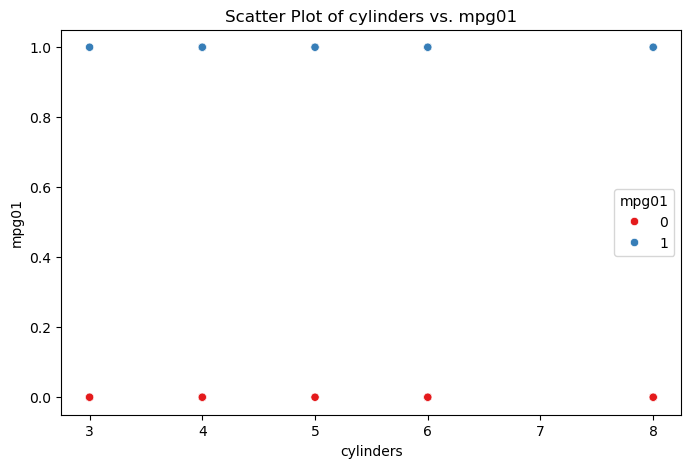

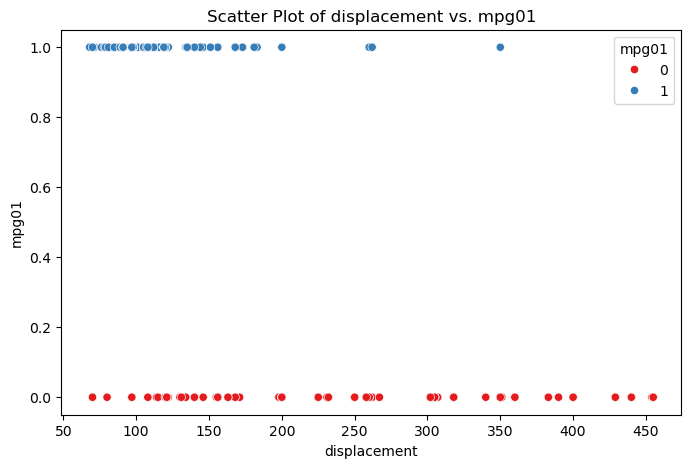

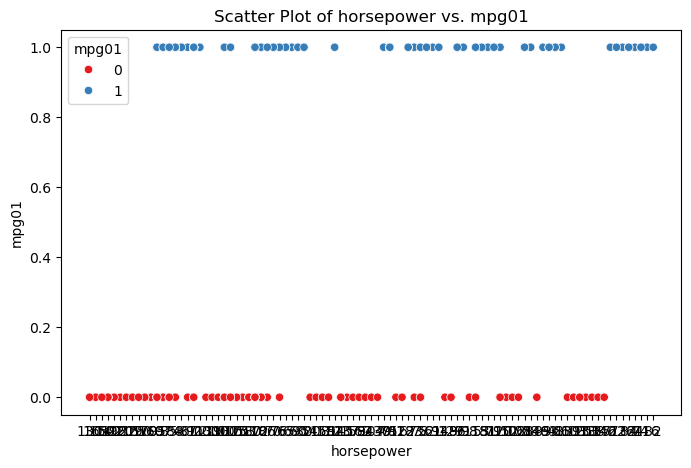

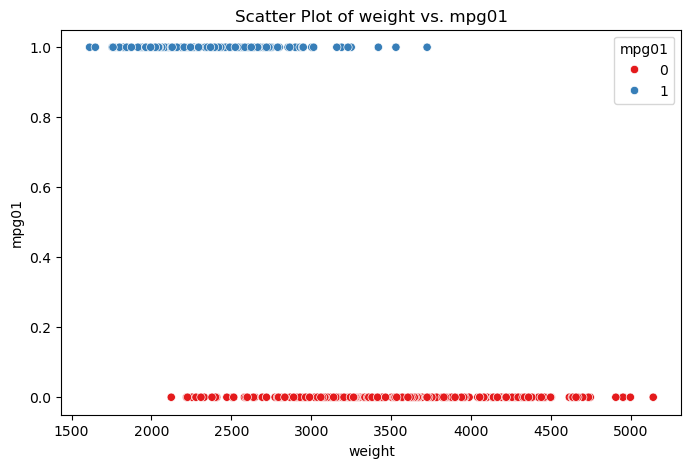

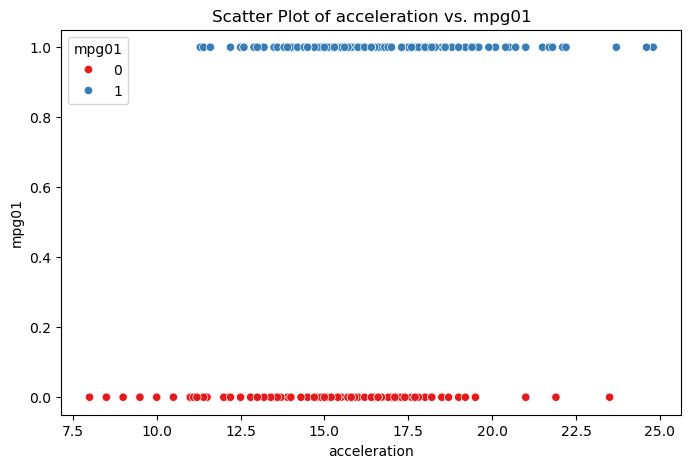

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots of each feature against mpg01
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=Auto, x=feature, y='mpg01', hue='mpg01', palette="Set1")
    plt.title(f'Scatter Plot of {feature} vs. mpg01')
    plt.show()


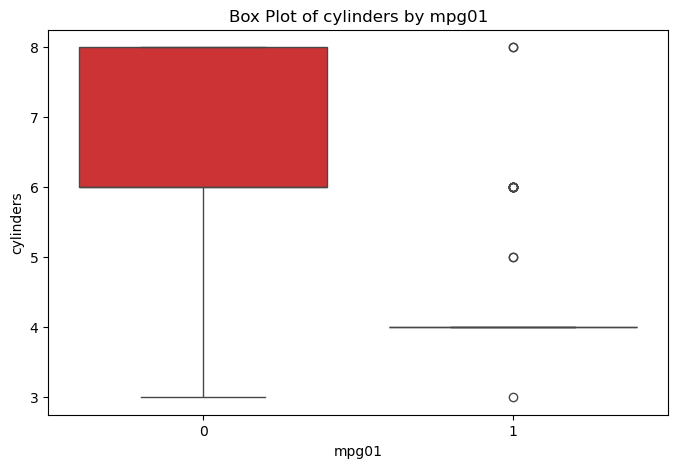

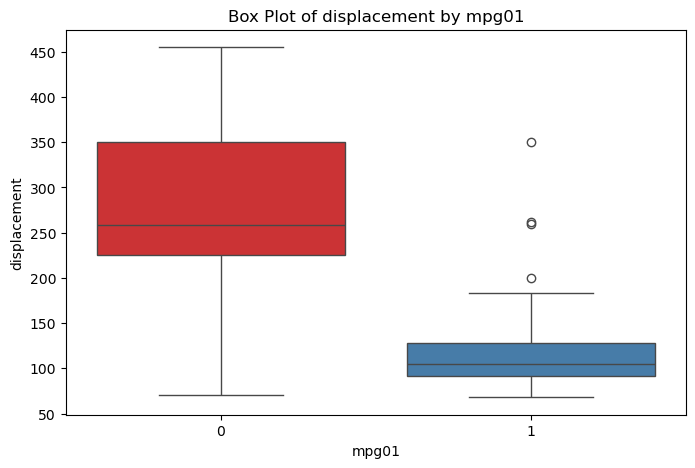

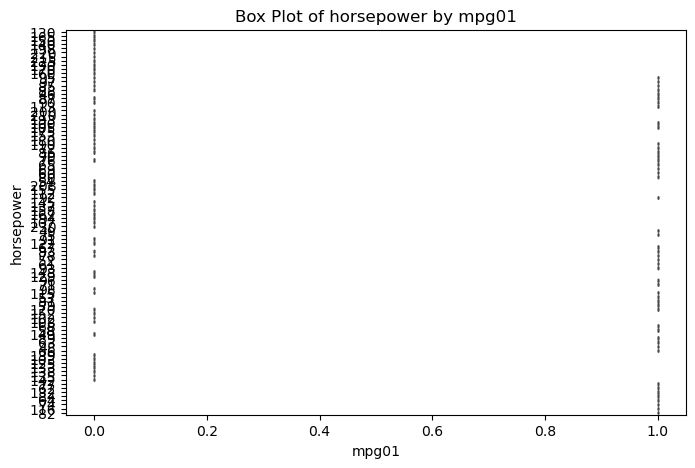

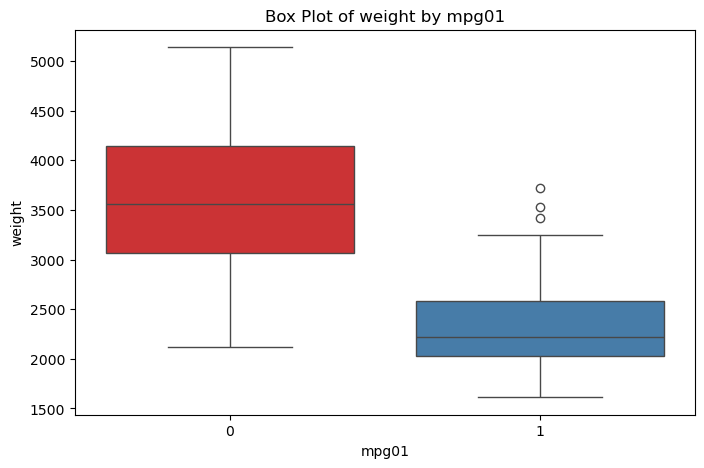

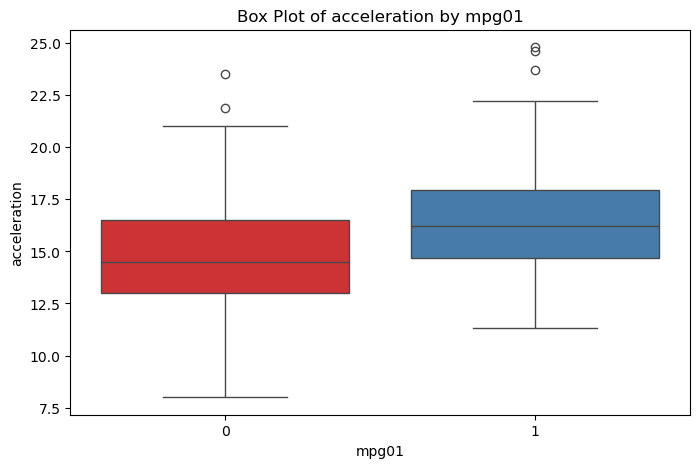

In [22]:
# Box plots of each feature by mpg01
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=Auto, x='mpg01', y=feature, hue='mpg01', palette="Set1", dodge=False)
    plt.title(f'Box Plot of {feature} by mpg01')
    plt.legend([], [], frameon=False)  # Remove redundant legend
    plt.show()

## (c) Split the data into a training set and a test set.

In [24]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = Auto.drop('mpg01', axis=1)  # All columns except 'mpg01'
y = Auto['mpg01']               # Target variable

# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the sizes of the training and test sets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 313
Test set size: 79


##  (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Select the most associated features
selected_features = ['displacement', 'horsepower', 'weight', 'acceleration']

# Create training and test sets using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = lda.predict(X_test_selected)

# Calculate the test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")


Test Accuracy: 0.9114
Test Error: 0.0886


##  (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Select the most associated features
selected_features = ['displacement', 'horsepower', 'weight', 'acceleration']

# Define training and test sets with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = qda.predict(X_test_selected)

# Calculate the test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")

Test Accuracy: 0.9620
Test Error: 0.0380


##  (f) Perform logistic regression on the training data in order to pre
dict mpg01 using the variables that seemed most associated wit 
 mpg01 in (b). What is the test error of the model obtained?

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the most associated features
selected_features = ['weight', 'displacement', 'horsepower']

# Define training and test sets with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_selected)

# Calculate the test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")


Test Accuracy: 0.9494
Test Error: 0.0506


##  (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Select the most associated features
selected_features = ['weight', 'displacement', 'horsepower']

# Define training and test sets with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform Naive Bayes
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = nb.predict(X_test_selected)

# Calculate the test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")


##  (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select the most associated features
selected_features = ['weight', 'displacement', 'horsepower']

# Define training and test sets with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# List to store test errors for different values of K
test_errors = []

# Try different values of K (e.g., 1 to 20)
for k in range(1, 21):
    # Initialize and train the KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test_selected)
    
    # Calculate test accuracy and test error
    test_accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - test_accuracy
    test_errors.append((k, test_error))
    
    print(f"K = {k}: Test Accuracy = {test_accuracy:.4f}, Test Error = {test_error:.4f}")

# Find the K with the minimum test error
best_k, best_test_error = min(test_errors, key=lambda x: x[1])
print(f"\nBest K = {best_k} with Test Error = {best_test_error:.4f}")


K = 1: Test Accuracy = 0.8734, Test Error = 0.1266
K = 2: Test Accuracy = 0.8608, Test Error = 0.1392
K = 3: Test Accuracy = 0.8861, Test Error = 0.1139
K = 4: Test Accuracy = 0.9114, Test Error = 0.0886
K = 5: Test Accuracy = 0.8987, Test Error = 0.1013
K = 6: Test Accuracy = 0.8987, Test Error = 0.1013
K = 7: Test Accuracy = 0.8987, Test Error = 0.1013
K = 8: Test Accuracy = 0.9114, Test Error = 0.0886
K = 9: Test Accuracy = 0.8987, Test Error = 0.1013
K = 10: Test Accuracy = 0.8987, Test Error = 0.1013
K = 11: Test Accuracy = 0.9114, Test Error = 0.0886
K = 12: Test Accuracy = 0.9114, Test Error = 0.0886
K = 13: Test Accuracy = 0.9114, Test Error = 0.0886
K = 14: Test Accuracy = 0.9367, Test Error = 0.0633
K = 15: Test Accuracy = 0.9114, Test Error = 0.0886
K = 16: Test Accuracy = 0.9367, Test Error = 0.0633
K = 17: Test Accuracy = 0.9114, Test Error = 0.0886
K = 18: Test Accuracy = 0.9367, Test Error = 0.0633
K = 19: Test Accuracy = 0.9241, Test Error = 0.0759
K = 20: Test Accuracy

## CH04 Q15 
## This problem involves writing functions.
## (a) Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results. Hint: Recall that x**a raises x to the power a. Use the print() function to display the result.

In [54]:
def Power():
    result = 2 ** 3
    print(f"2 raised to the power of 3 is: {result}")

# Call the function
Power()

2 raised to the power of 3 is: 8


## (b) Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x**a. You can do this by beginning your function with the line
## def Power2(x, a):
## Youshould be able to call your function by entering, for instance, Power2(3, 8) on the commandline. This should output the value of $3^8$, namely, 6, 561.

In [59]:
def Power2(x,a):
    result = x ** a
    print(f"{x} raised to the power of {a} is: {result}")

# Call the function
Power2(3,8)

3 raised to the power of 8 is: 6561


##  (c) Using the Power2() function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [66]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

10 raised to the power of 3 is: 1000
8 raised to the power of 17 is: 2251799813685248
131 raised to the power of 3 is: 2248091


## (d) Now create a new function, Power3(), that actually returns the result x**a as a Python object, rather than simply printing it to the screen. That is, if you store the value x**a in an object called result within your function, then you can simply return  this result, using the following line: return result .Note that the line above should be the last line in your function, and it should be indented 4 spaces.

In [70]:
def Power3(x, a):
    result = x ** a
    return result


##  (e) Now using the Power3() function, create a plot of f(x)=$x^2$.The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the ax.set_xscale() and ax.set_yscale() methods of .set_xscale() the axes you are plotting to.

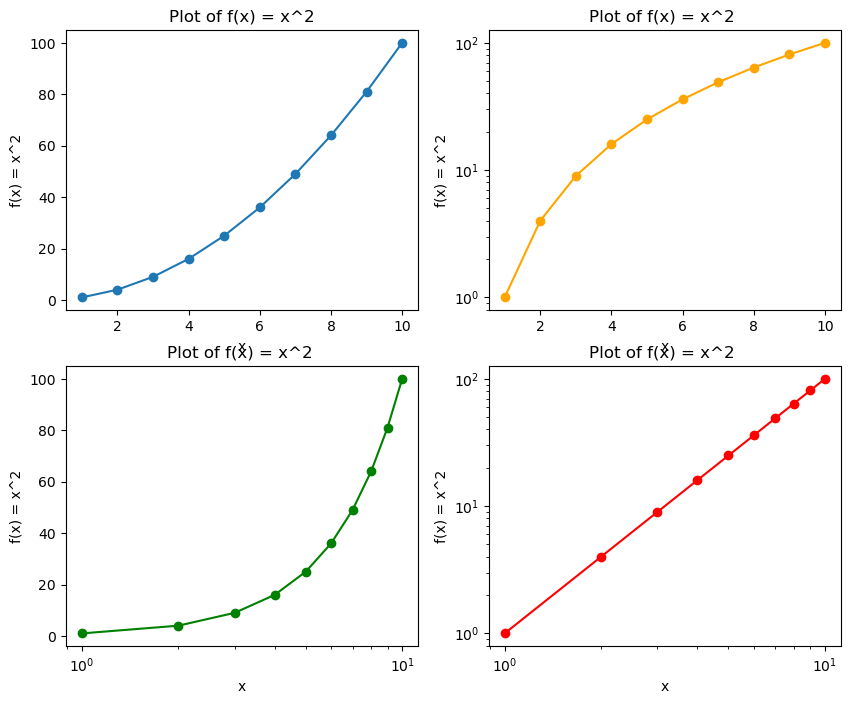

In [85]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 11)
y = Power3(x, 2) 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, y, marker='o')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x) = x^2')
axs[0, 0].set_title('Plot of f(x) = x^2')
axs[0, 0].set_xscale('linear')
axs[0, 0].set_yscale('linear')

axs[0, 1].plot(x, y, marker='o', color='orange')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('f(x) = x^2')
axs[0, 1].set_title('Plot of f(x) = x^2 ')
axs[0, 1].set_xscale('linear')
axs[0, 1].set_yscale('log')

axs[1, 0].plot(x, y, marker='o', color='green')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('f(x) = x^2')
axs[1, 0].set_title('Plot of f(x) = x^2 ')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('linear')

axs[1, 1].plot(x, y, marker='o', color='red')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('f(x) = x^2')
axs[1, 1].set_title('Plot of f(x) = x^2 ')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')

plt.show()

 ## (f) Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x. For instance, if you call PlotPower(np.arange(1, 11), 3), then a plot should be created with an x-axis taking on values 1, 2,...,10, and a y-axis taking on values $1^3$, $2^3$,..., $10^3$

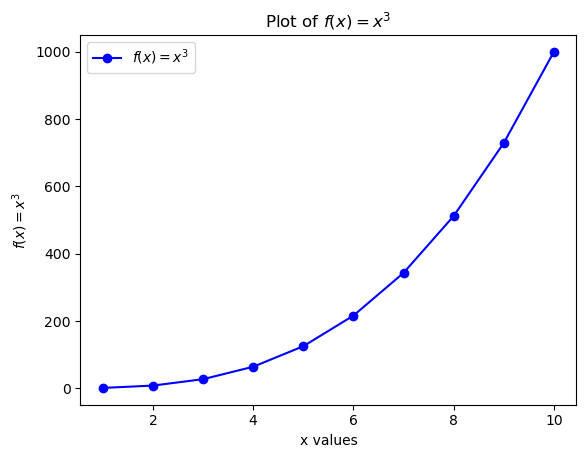

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define PlotPower function
def PlotPower(x_values, a):
    # Compute y = x^a for each x in x_values
    y_values = [x ** a for x in x_values]
    
    # Plot x vs. y
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values, marker='o', linestyle='-', color='b', label=f'$f(x) = x^{a}$')
    
    # Label axes and set title
    ax.set_xlabel("x values")
    ax.set_ylabel(f"$f(x) = x^{a}$")
    ax.set_title(f"Plot of $f(x) = x^{a}$")
    ax.legend()
    
    # Show plot
    plt.show()

# Example usage
PlotPower(np.arange(1, 11), 3)
